In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_json('D:\\Springboard\\Technical Project\\24_Ultimate Technologies Inc. Take-Home Challenge\\logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df['login_time'].value_counts()

1970-02-12 11:16:53    3
1970-02-24 23:09:57    3
1970-03-29 03:24:57    3
1970-03-14 17:45:52    3
1970-01-09 01:31:25    3
                      ..
1970-03-08 11:52:16    1
1970-01-08 09:30:07    1
1970-01-22 21:54:51    1
1970-01-08 23:27:50    1
1970-03-19 10:10:37    1
Name: login_time, Length: 92265, dtype: int64

In [6]:
df2 = pd.DataFrame(df['login_time'].value_counts())

In [7]:
df2.head()

,login_time
1970-02-12 11:16:53,3
1970-02-24 23:09:57,3
1970-03-29 03:24:57,3
1970-03-14 17:45:52,3
1970-01-09 01:31:25,3


In [8]:
df2.rename({'login_time':'counts'}, inplace=True, axis=1)

In [9]:
df2.head()

,counts
1970-02-12 11:16:53,3
1970-02-24 23:09:57,3
1970-03-29 03:24:57,3
1970-03-14 17:45:52,3
1970-01-09 01:31:25,3


In [10]:
df3 = df2.resample('15min').sum()

In [11]:
df3.head()

,counts
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


It can be seen from the information that the login counts are available from 1 Januray to 13 April
Let us now visualize the patterns of login counts monthly, weekly and daily.

### Monthly Trends

In [13]:
by_month = df3.resample('M').sum()

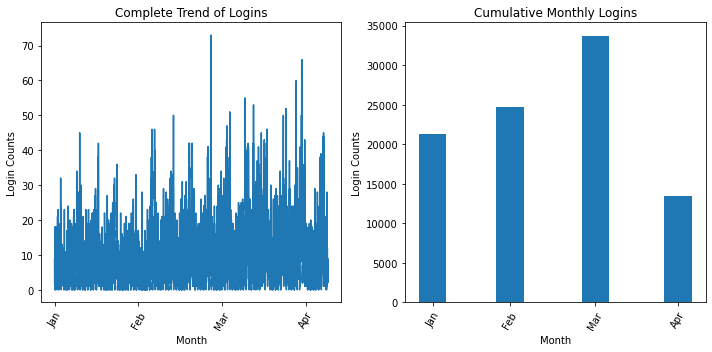

In [14]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df3)
plt.title('Complete Trend of Logins')
plt.ylabel('Login Counts')
plt.xlabel('Month')
plt.xticks(df3.index[::3000], df3.index[::3000].strftime('%b'), rotation=60)
plt.subplot(1,2,2)
plt.bar(by_month.index, by_month['counts'], width=10)
plt.title('Cumulative Monthly Logins')
plt.ylabel('Login Counts')
plt.xlabel('Month')
plt.xticks(by_month.index, by_month.index.strftime('%b'), rotation=60)
plt.tight_layout()
plt.show()

It can be seen from the above plots that in the month of March maximum cabs were booked. It shows the increasing trend from January to March, however there are ony 13 days in April and hence the same cannot be considered for any forecast.

### Weekly Trends

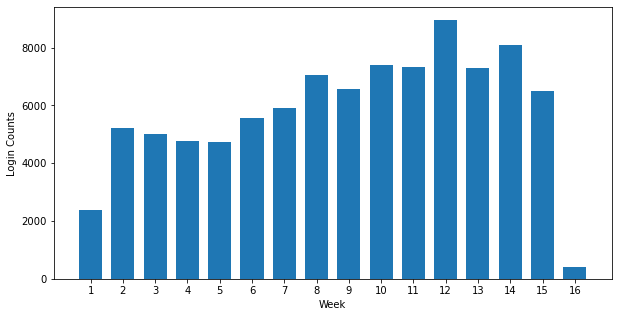

In [15]:
by_week = df3.resample('W').sum()
plt.subplots(figsize=(10,5))
plt.bar(by_week.index, by_week['counts'], width=5)
plt.ylabel('Login Counts')
plt.xlabel('Week')
plt.xticks(by_week.index, np.arange(1,len(by_week.index)+1))
plt.show()

In [16]:
by_week.head(16)

,counts
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554
1970-03-08,7398


The above figure shows that the bookings are increasing as we move from Januray to April. In monthly trend April is having only 13 days and hence we could not visualize that but here it seems that Week 14 contains 5 days of April and Week 15 is complete of April where the bookings are almost similar to that of previous months. Third Week of March is the week with highest login counts. 

### Daily Trends

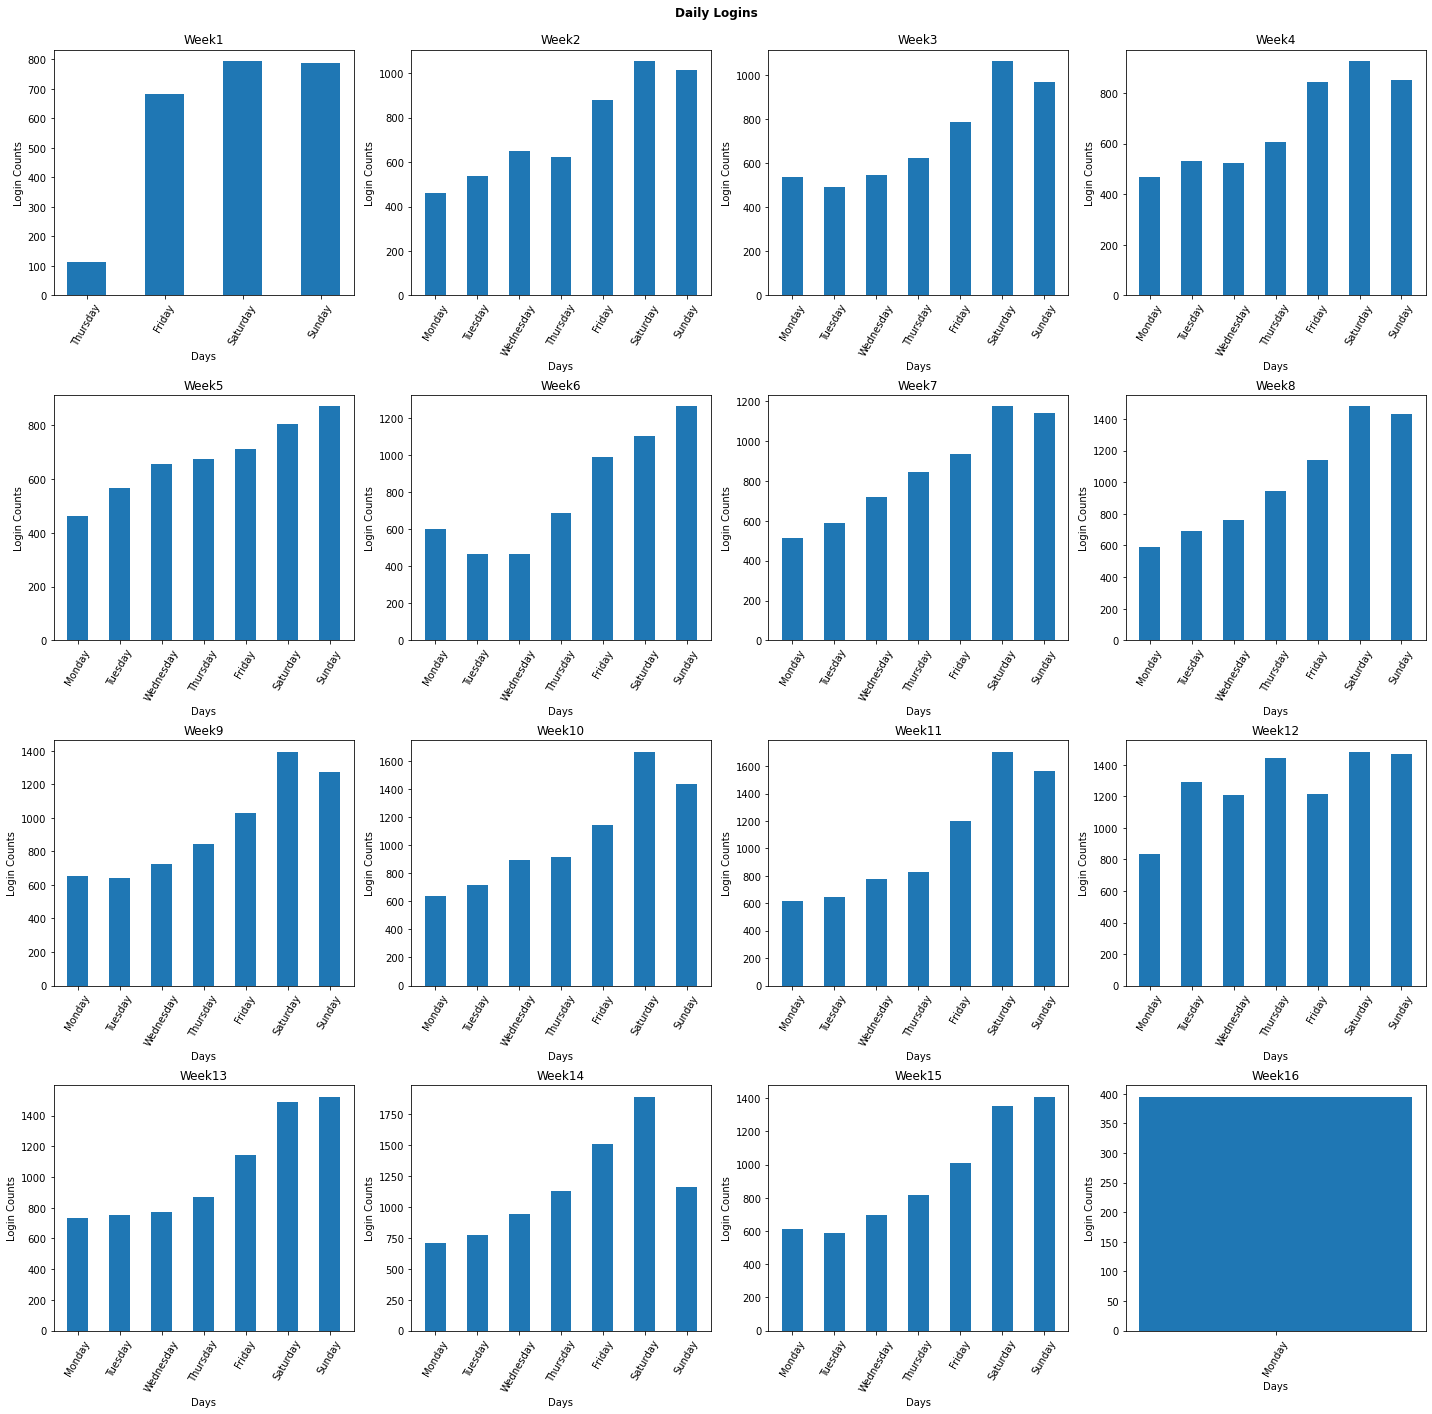

In [17]:
from datetime import timedelta
by_day = df3.resample('D').sum()
plt.subplots(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    if i==0:
        temp_df = by_day.loc[by_day.index[0]:by_week.index[i]]
    else:
        temp_df = by_day.loc[by_week.index[i-1]+timedelta(days=1):by_week.index[i]]
    plt.bar(temp_df.index, temp_df['counts'], width=.5)
    plt.title('Week'+str(i+1))
    plt.ylabel('Login Counts')
    plt.xlabel('Days')
    plt.xticks(temp_df.index, temp_df.index.day_name(), rotation=60)
plt.suptitle('Daily Logins', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

The above plots clearly shows that in the weekends bookings are maximum, this means that the cabs are mostly used for recreational purpose rather than business purpose. 

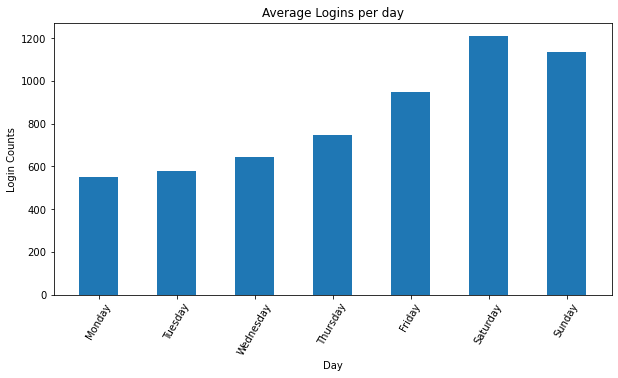

In [18]:
#Average logins per day for the entire time period
by_day['weekday'] = by_day.index.dayofweek
avg_per_day = (by_day.groupby('weekday').sum()/16).sort_index()
plt.subplots(figsize=(10,5))
plt.bar(avg_per_day.index, avg_per_day['counts'], width=.5)
plt.title('Average Logins per day')
plt.ylabel('Login Counts')
plt.xlabel('Day')
plt.xticks(avg_per_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=60)
plt.show()

The above plots of average shows the same trend as before

### Hourly Trends

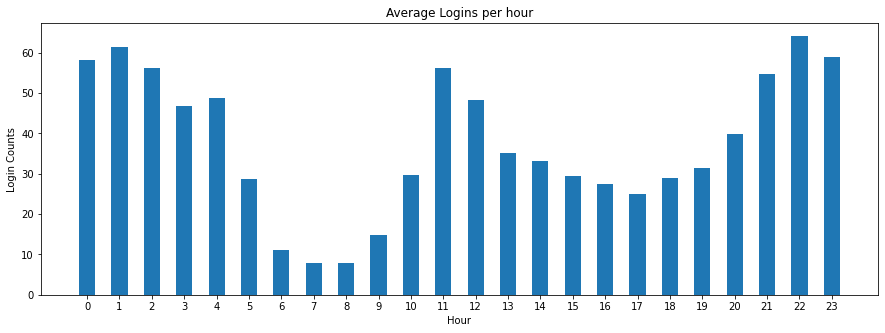

In [19]:
by_hour = df3.resample('H').sum()
by_hour['hour'] = by_hour.index.hour
avg_per_hour = (by_hour.groupby('hour').sum()/(31+28+31+13)).sort_index()
plt.subplots(figsize=(15,5))
plt.bar(avg_per_hour.index, avg_per_hour['counts'], width=.5)
plt.title('Average Logins per hour')
plt.ylabel('Login Counts')
plt.xlabel('Hour')
plt.xticks(avg_per_hour.index)
plt.show()

It seems that mostly the cabs are used in the night time from 9 pm to 2 am which also confirms our prediction that mostly cabs are used for recreational purpose rather than in business hours.

Let us see one more trend that how on a prticular day like monday or sunday, what is the hourly trend

In [20]:
by_hour['weekday'] = by_hour.index.dayofweek
by_hour.head()

,counts,hour,weekday
1970-01-01 20:00:00,24,20,3
1970-01-01 21:00:00,9,21,3
1970-01-01 22:00:00,21,22,3
1970-01-01 23:00:00,58,23,3
1970-01-02 00:00:00,53,0,4


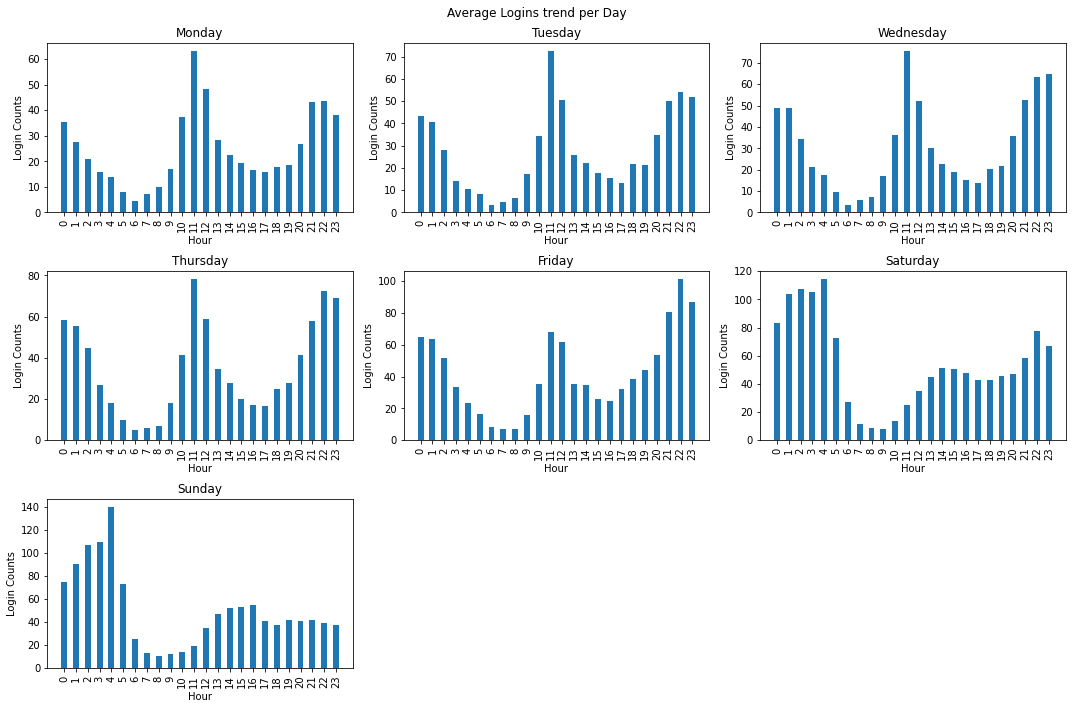

In [21]:
import calendar
by_week_by_hour = by_hour.groupby(['weekday', 'hour']).sum()/by_hour.groupby(['weekday', 'hour']).count()
plt.subplots(figsize=(15,10))
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.bar(by_week_by_hour.loc[i].index, by_week_by_hour.loc[i, 'counts'], width=.5)
    plt.title(calendar.day_name[i])
    plt.ylabel('Login Counts')
    plt.xlabel('Hour')
    plt.xticks(by_week_by_hour.loc[i].index, rotation=90)
plt.suptitle('Average Logins trend per Day')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

The above plot indicates that on the weekdays most of the cabs are booked between 11 am to 12 pm with comparable bookings in evening between 9 pm to 12 am. However, the weekends shows completely different trend with major bookings between 9 pm to 4 am except sunday where major bookings are between 2 am to 4 am.

### Conclusion
1. The number of bookings shows increasing trend as the year is passing by from January to March.
2. The above statement has been confirmed from the weekly analysis as well which shows that though March is the month of highest bookings, the april month also have comparable bookings in first two weeks.
3. The daily analysis indicates that the cabs are mostly used for personal purpose as most of the bookings are between 9 pm to 2 am.
4. In the weekdays mostlythe cabs are booked between 11 am to 12 pm.
5. Highest number of cabs are booked on staurdays between 9 pm to 4 am wheich is mostly booked people for weekend enjoyment.
6. Sundays indicates highest booking between 2 am to 4 am.

## Experiments and Metric Design
https://github.com/pgupta88/Springboard/blob/master/Ultimate%20Technologies%20Inc.%20Take-Home%20Challenge/Experiment%20and%20Metric%20Design.pdf

In [62]:
data = pd.read_json('D:\\Springboard\\Technical Project\\24_Ultimate Technologies Inc. Take-Home Challenge\\ultimate_data_challenge.json')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are total 12 columns out of which 3 columns have null values i.e. avg_rating_of_driver, avg_rating_by_driver & phone

In [64]:
#Let's look at the summary statistics of numerical columns
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [65]:
# Let's look at the summary of categorical columns
data.describe(include='object')

,city,signup_date,last_trip_date,phone
count,50000,50000,50000,49604
unique,3,31,182,2
top,Winterfell,2014-01-18,2014-06-29,iPhone
freq,23336,2948,2036,34582


#### Fill the null values
The probable reason for avg_rating_by_driver and avg_rating_of driver containing null values might be that ratings are not given. These can be fill with median values. The reason for phone column containing null values might be security reason from the rider end or any glitch. These null values can also be fill with most occuring i.e. iPhone

In [66]:
data['phone'].value_counts().idxmax()

'iPhone'

In [67]:
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].median(), inplace=True)
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].median(), inplace=True)
data['phone'].fillna(data['phone'].value_counts().idxmax(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [68]:
#Find out what is the latest date of last_trip_date
data['last_trip_date'].max()

'2014-07-01'

So any rider whose last_trip_date is after '2014-06-01' is considered as retained otherwise not retained

In [69]:
# Let's make the column retained which contains 0 or 1 representing 'not retained' & 'retained' respectively
data['retained'] = (data['last_trip_date']>'2014-06-01').astype(int)
data[['retained', 'last_trip_date']].head(10)

,retained,last_trip_date
0,1,2014-06-17
1,0,2014-05-05
2,0,2014-01-07
3,1,2014-06-29
4,0,2014-03-15
5,1,2014-06-06
6,0,2014-01-25
7,0,2014-01-29
8,0,2014-02-01
9,0,2014-01-05


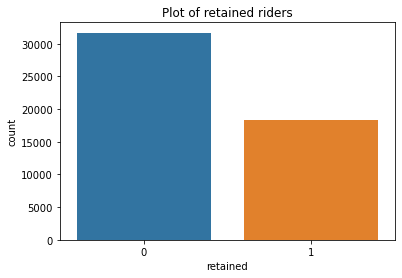

In [70]:
sns.countplot(x='retained', data=data)
plt.title('Plot of retained riders')
plt.show()

In [71]:
# Calculating the fraction of retained riders
frac_retained = data['retained'].value_counts(normalize=True)[1]*100
print('The fraction of rider retained is '+ str(round(frac_retained, 2)) + '%')

The fraction of rider retained is 36.62%


#### Data Cleaning
Since now we have created a column wheteher a rider is retained or not, we do not need the column last_trip_date.
Also since all the data is of riders who signed up in January 2014, we also do not need the column signup_date.
Lastly we will convert the bool type column 'ultimate_black_user' to 0 & 1 for ease of modeling

In [73]:
data.drop(columns=['signup_date', 'last_trip_date'], inplace=True)
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int32  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  retained                50000 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 3.8+ MB


#### Exploratory Data Analaysis
We will visualize the categorical and numerical columns differently to observe following things:
1. If there are any outliers in numerical columns
2. How that particular attribute affects the rider retention

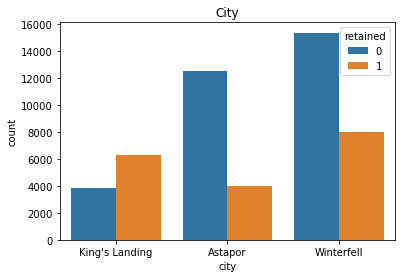

In [74]:
# 'city' column (categorical)
sns.countplot(x='city', data=data, hue='retained')
plt.title('City')
plt.show()

The above plot indicates that rider of King's Landing are much more likely to be retained than Astapor City of Winterfell.
Winterfell is having highest number of riders and also highest number of riders who are not active.

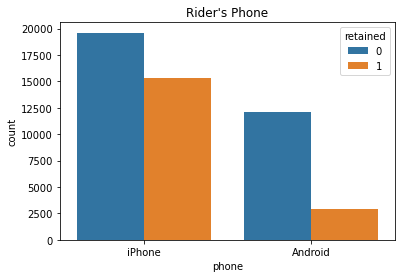

In [75]:
# 'phone' column (categorical)
sns.countplot(x='phone', data=data, hue='retained')
plt.title('''Rider's Phone''')
plt.show()

There are more iphone users than android users and probability of rider retaining with Ultimate is more with iphone users

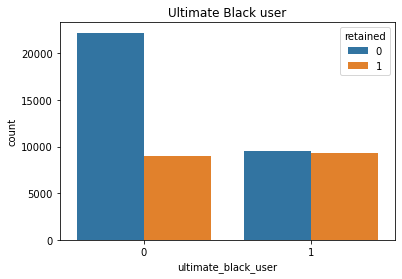

In [84]:
# 'ultimate_black_user' column (categorical)
sns.countplot(x='ultimate_black_user', data=data, hue='retained')
plt.title('Ultimate Black user')
plt.show()

There are more riders who do not use Ultimate black and there is approaximate 50% chance that is a rider takes Ultimate Black he/she will be retained, however there is only 1/4th of a chane that if a rider does not use Ultimate Black he/she will be retained.

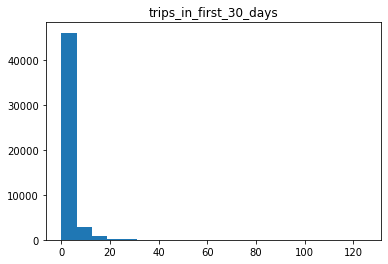

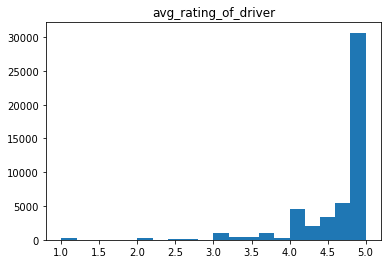

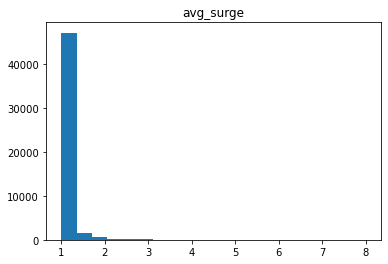

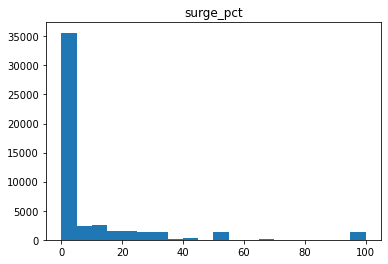

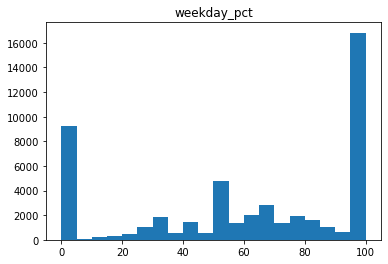

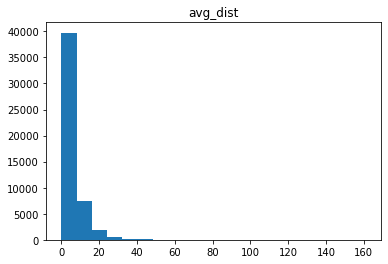

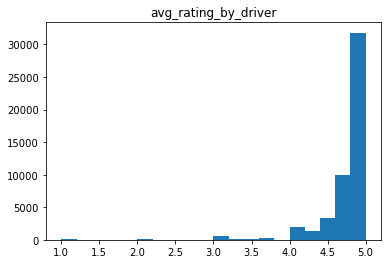

In [88]:
# Visualizing the distribution of numerical data
numerical_columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
                     'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
for column in numerical_columns:
    plt.hist(data[column], bins=20)
    plt.title(column)
    plt.show()

The above plots of numerical attributes indicates that the distribution of the features are all skewed:
1. Trips in first 30 days are mostly close to 0 which indicates that users are reluctant to use the services, may be because of price or any other reason that needs to be identified.
2. Average ratings of driver are mostly more than 4.7 which indicates that drivers are doing their best to make the riders comfortable.
3. Average rating by driver also indicates same trend of more than 4.7 indicating the riders are well behaved and respect driver partners
4. Average surge and surge percentage plot indicates that mostly riders are provided with rides with no or little surge price but still Ultimate is able to retain 36.62% of riders and in the first 30 days trips are mostly close to nill. Ultimate needs to look for different factors like base price, conditions of car etc.
5.  The plot of weekday percentage indicates that there are two group of riders, one who only travels on weekdays and the second who only travels on weekends. The no. of riders on weekdays are more than the no. of riders on weekends.
6. The plot of average distance shows that riders are mostly inclined to take short trips rather than long trips which again point towards the base price of cabs.

#### Correlation between numerical features
Let's visualize if there are any correlation between two attributes

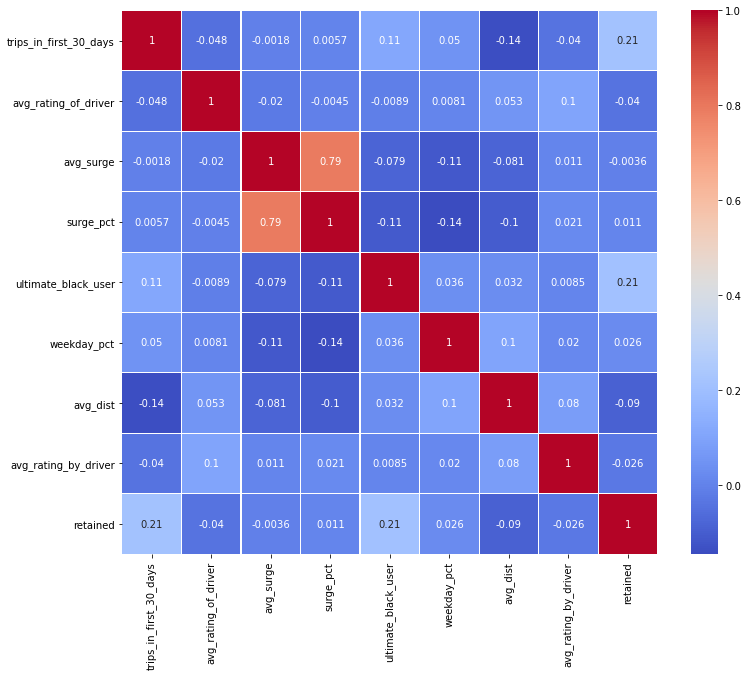

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


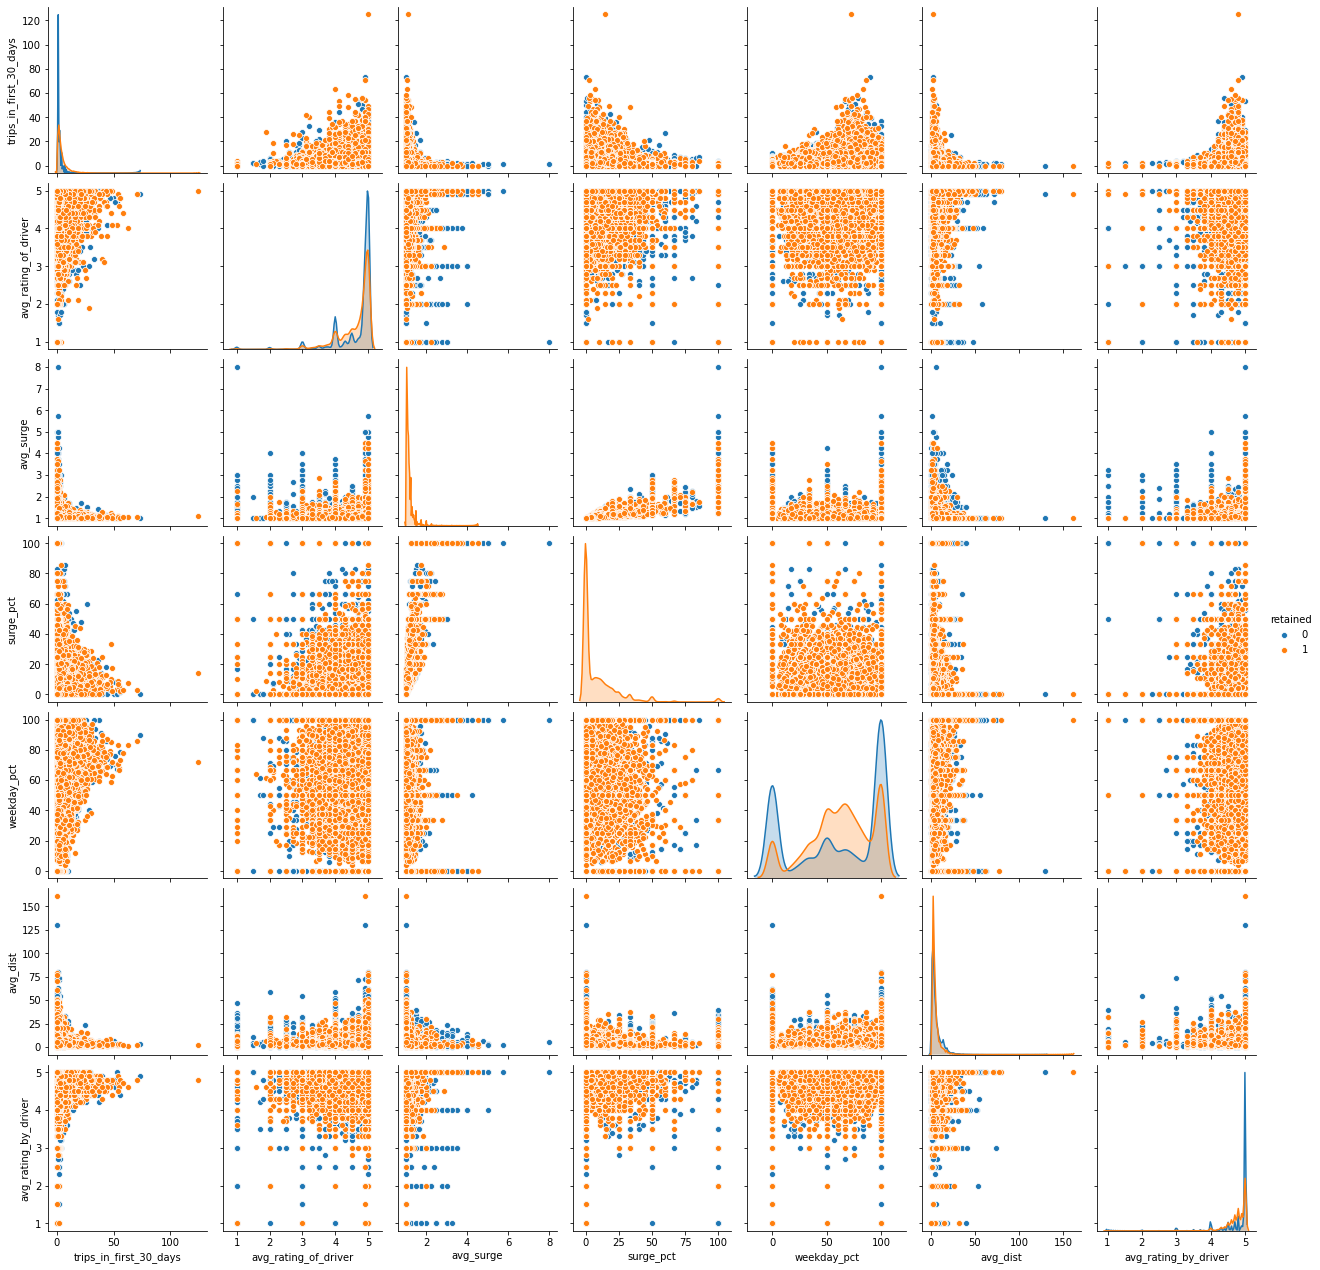

In [94]:
# Plot the heat map of correlation matrix
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

# Plot the pairplot between features
sns.pairplot(data.drop(columns=['ultimate_black_user']), hue='retained')
plt.show()

There seems to be no correlation between any feature except a minor correlation between average surge and surge percentage which is expected

### Modelling
The main goal of the modelling exercise is to predict whether or not a user will be retained for Ultimate services and what are the factors affecting the retention of riders. The important factors will then by analysed such that changing those factors can increase the retention rate of riders.
This is a classification problem and several algorithms are available for the classification, some of which are:
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree Classifier
4. Support Vector Machine
5. Adaboost
6. K-nearest neighbor
7. Naive Bayes Classifier
8. XGBoost
The models to be adopted for any data science problem are chosen from the experiments by seeing the metrics of success. Some of the algortihms have been experimented below:

#### Dataset Preparation for Modelling

In [95]:
# Create One Hot Encoding for categorical features
data_modeling = pd.get_dummies(data, drop_first=True)
print(data_modeling.head())
data_modeling.info()

   trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  retained  \
0                    1         46.2      3.67                   5.0         1   
1                    0         50.0      8.26                   5.0         0   
2                    0        100.0      0.77                   5.0         0   
3                    1         80.0      2.36                   4.9         1   
4                    0         82.4      3.13                   4.9         0   

   city_King's Landing  city_Winterfell  phone_iPhone  
0                 

In [98]:
# Split the data to dependent and independent variables
X = data_modeling.drop(columns='retained')
y = data_modeling['retained']
print(X.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int32  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   city_King's Landing     50000 non-null  uint8  
 9   city_Winterfell         50000 non-null  uint8  
 10  phone_iPhone            50000 non-null  uint8  
dtypes: float64(6), int32(1), int64(1), uint8(3)
memory usage: 3.0 MB
None


0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int32

In [100]:
# Split the data into test and train and standardize the train and test data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Modeling Experiments

Cross Validation Accuracy: 0.7750666666666668
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 8}
Accuracy: 0.77376
Precision: 0.7192278766608172
Recall: 0.6268298011798121
F1-score: 0.6698575764650945
Roc-AUC: 0.7427346027229363


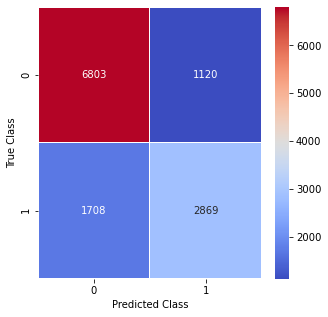

In [108]:
# 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc = DecisionTreeClassifier(random_state=42)
dtc_cv = GridSearchCV(dtc, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_cv.fit(X_train, y_train)
y_pred = dtc_cv.predict(X_test)
print('Cross Validation Accuracy:', dtc_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=dtc_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_cv.classes_, yticklabels=dtc_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Cross Validation Accuracy: 0.7255733333333333
Best parameter from Cross Validation: {'C': 0.001}
Accuracy: 0.72664
Precision: 0.6942397856664434
Recall: 0.4529167577015512
F1-score: 0.5481951606505354
Roc-AUC: 0.6688413146074335


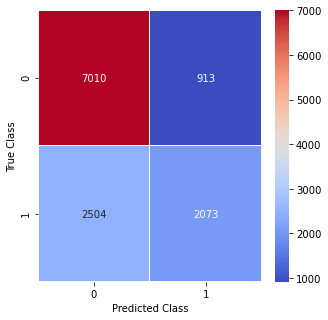

In [109]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C':Cs}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
lr_cv.fit(X_train, y_train)
y_pred = lr_cv.predict(X_test)
print('Cross Validation Accuracy:', lr_cv.best_score_)
print('Best parameter from Cross Validation:', lr_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=lr_cv.classes_), 
            annot=True, fmt='d', xticklabels=lr_cv.classes_, yticklabels=lr_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Cross Validation Accuracy: 0.7696
Best parameter from Cross Validation: {'n_neighbors': 18}
Accuracy: 0.7628
Precision: 0.7093506493506494
Recall: 0.5966790474109679
F1-score: 0.6481547407143705
Roc-AUC: 0.7277223332473243


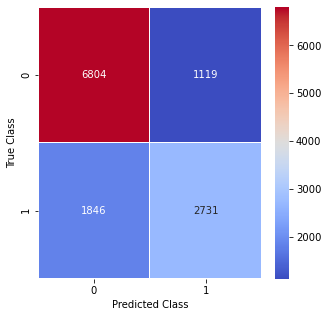

In [110]:
# 3. kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print('Cross Validation Accuracy:', knn_cv.best_score_)
print('Best parameter from Cross Validation:', knn_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=knn_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_cv.classes_, yticklabels=knn_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Cross Validation Accuracy: 0.7915733333333332
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200}
Accuracy: 0.78712
Precision: 0.7391412880678981
Recall: 0.6469303036923749
F1-score: 0.6899685424676686
Roc-AUC: 0.7575179096399525
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200}


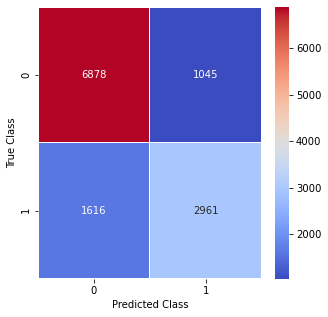

In [112]:
# 4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
max_features = ['auto', 'sqrt']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
n_estimators = [10,20,50,100,200,500]
criterion = ['gini', 'entropy']
param_grid = {'max_features':max_features, 'max_depth':max_depth, 'n_estimators':n_estimators, 'criterion':criterion}
rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(rfc, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
rfc_cv.fit(X_train, y_train)
y_pred = rfc_cv.predict(X_test)
print('Cross Validation Accuracy:', rfc_cv.best_score_)
print('Best parameter from Cross Validation:', rfc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
print('Best parameter from Cross Validation:', rfc_cv.best_params_)
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=rfc_cv.classes_), 
            annot=True, fmt='d', xticklabels=rfc_cv.classes_, yticklabels=rfc_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Cross Validation Accuracy: 0.7757333333333333
Best parameter from Cross Validation: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7752
Precision: 0.733174980205859
Recall: 0.606947782390212
F1-score: 0.6641166626822854
Roc-AUC: 0.739672300888404
Best parameter from Cross Validation: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


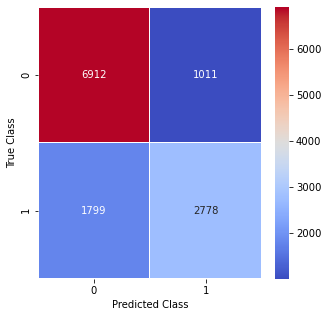

In [113]:
# 4. Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
kernel = ['linear', 'rbf']
param_grid = {'C':C, 'gamma':gamma, 'kernel':kernel}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svc_cv.fit(X_train, y_train)
y_pred = svc_cv.predict(X_test)
print('Cross Validation Accuracy:', svc_cv.best_score_)
print('Best parameter from Cross Validation:', svc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
print('Best parameter from Cross Validation:', svc_cv.best_params_)
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=svc_cv.classes_), 
            annot=True, fmt='d', xticklabels=svc_cv.classes_, yticklabels=svc_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

So, the above experiments indicate that Random Forest Classifier is the best model with 78.7% accuracy on the test dataset.
Now let us see which factors are most important for retention of riders

                   Feature  Importance_Factor
9          city_Winterfell           0.017208
1     avg_rating_of_driver           0.053466
4      ultimate_black_user           0.058208
10            phone_iPhone           0.066334
0   trips_in_first_30_days           0.073821
2                avg_surge           0.090990
6                 avg_dist           0.109740
5              weekday_pct           0.114425
3                surge_pct           0.120552
8      city_King's Landing           0.120973
7     avg_rating_by_driver           0.174283


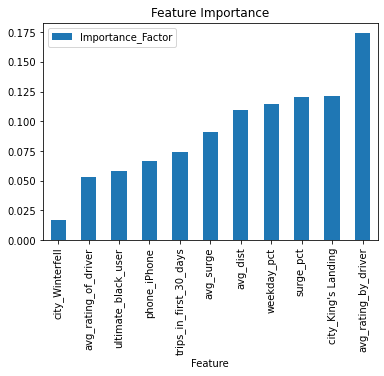

In [115]:
feature_imp = pd.DataFrame(list(zip(X.columns, rfc_cv.best_estimator_.feature_importances_)), columns=['Feature', 'Importance_Factor'])
feature_imp.sort_values('Importance_Factor', inplace=True)
print(feature_imp)
feature_imp.plot(x='Feature', y='Importance_Factor', kind='bar')
plt.title('Feature Importance')
plt.show()

The most important factors responsible for the retention of riders are:
1. Average Rating By Driver - The rating of drivers have encouraged the riders to continue using the cabs. Hence, drivers must be encouraged to give good ratings to the passangers.
2. Rider is from King's Landing - The city of rider have influence on their retention but there is nothing Ultimate can do about it.
3. Surge Percentage - Ultimate must optimize their surge pricing which encouraged more riders to use the cabs
4. Weekday Rides - Encourage the riders to use cabs on weekdays. This may be achieved by offering them discounts on weekday rides or encourage drivers to get more duty on weekdays by giving them incentives.
5. Average Distance - Providing good cabs and optimize prices for long distance trips will increase the riders to book cabs for long distances and thus retaining the riders. 